# 12. Der Deutsch-Algorithmus

Im Buch das Problem von Deutsch genannt. **David Deutsch** ist ein israelisch-britischer Physiker auf dem Gebiet der Quanteninformationstheorie.

Wenn Sie die Echtheit einer Münze prüfen wollen, müssen Sie beide Seiten der Münze genau unter die Lupe nehmen. Quantenmechanisch lässt sich eine *Münze* so präparieren, dass beide Seiten mit einem *Shot* (also ohne die Münze zu drehen) geprüft werden können.

Dazu werden zwei Qubits benötigt: $q_0$ im Zustand $|0\rangle$ (Kopf) und $q_1$ im Zustand $|1\rangle$ (Zahl) sowie ein klassisches Register $c$ mit einem Bit.

### Definition des Schaltkreises


In [1]:
from qiskit import QuantumCircuit, execute, BasicAer
backend = BasicAer.get_backend('statevector_simulator')

circuit = QuantumCircuit(2, 2)

circuit.x(0) #Setzt den Zustand von q_0 auf |1> (von Kopf auf Zahl)
#circuit.x(1)  #Setzt den Zustand von q_1 auf |1> (von Kopf auf Zahl)

circuit.barrier()
#Zur Kontrolle wird der State-Vector des Ausgangszustands berechnet:
state_vector = execute(circuit, backend).result().get_statevector() #Extraktion des Zustandsvektors
print('Der Ausgangszustand ist: ')
print(state_vector) # Ausgabe des Zustandsvektors als Zeilenvektor mit vier (komplexen) Komponenten

Der Ausgangszustand ist: 
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


### Präparation
Nach der ersten Barriere erfolgt die Präparation der *Münze*. Wir drucken den Zustandsvektor anschliessend aus. Die Bedeutung dieses Vektors erschliesst sich weiter unten, wo wir alle Möglichkeiten analysieren:

In [2]:
circuit.h(0)
circuit.h(1)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
#Zur Kontrolle wird der State-Vector vor der Messung berechnet:
state_vector = execute(circuit, backend).result().get_statevector() #Extraktion des Zustandsvektors
print('Der Endzustand ist: ')
print(state_vector) # Ausgabe des Zustandsvektors als Zeilenvektor mit vier (komplexen) Komponenten

Der Endzustand ist: 
[0.        +0.00000000e+00j 0.70710678-1.29893408e-16j
 0.        +0.00000000e+00j 0.70710678-1.29893408e-16j]


### Auswertung

Mit der abschliessenden Messung wird die *Münze* auf ihre Echtheit geprüft und der ganze Schaltkreis gezeichnet:

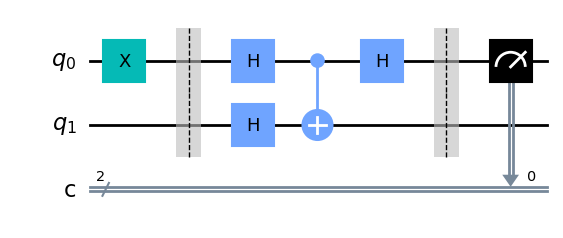

In [3]:
circuit.measure(0, 0)
circuit.draw('mpl')

Die Messung simulieren wir mit dem Qasm-Simulator:

In [4]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit, backend).result().get_counts()
print(result)

{'01': 1024}


Das Ergebnis ist eindeutig. Das Experiment wurde 1024mal wiederholt und jedesmal ist das Ergebnis `'1'` herausgekommen. Ohne die `shots`-Angabe läuft `execute` jeweils 1024mal durch. Sie können aber auch nur einen Durchlauf wählen: `shots=1`.

**Experiment** Vergewissern Sie sich davon, dass das Resultat immer `1` ist, wenn $q_0$ und $q_1$ im selben Zustand sind (der Registerzustand also entweder $|00\rangle$ oder $|11\rangle$ ist). Sind die Qubitzustände hingegen gleich, ist das Ergebnis immer `0` (der Registerzustand also entweder $|01\rangle$ oder $|10\rangle$ ist). Die *Münze* wird somit als *echt* eingeschätzt, falls die Beiden *Seiten* verschieden sind und als *gefälscht*, falls die beiden *Seiten* gleich sind.

### Analyse



Was geschieht nun genau in diesem Schaltkreis? Die Details sind im Buch in Kap. 20.4 auf S. 254 erklärt. Hier nur die Zusammenfassung:

- ist der Registerzustand zu Beginn z. B. $|01\rangle$ (die *Münze* also **echt**) wird er durch die Operationen in den Zustand:

  $$\frac{1}{\sqrt{2}}\left(\left|01\right\rangle+\left|11\right\rangle\right)=\frac{1}{\sqrt{2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\textcolor{red}{\left|1\right\rangle}=\frac{1}{\sqrt{2}}\begin{bmatrix}0 & 1 & 0 & 1 \end{bmatrix}$$
  
- ist der Registerzustand zu Beginn z. B. $|00\rangle$ (die *Münze* **manipuliert**) wird er durch die Operationen in den Zustand:

  $$\frac{1}{\sqrt{2}}\left(\left|00\right\rangle+\left|10\right\rangle\right)=\frac{1}{\sqrt{2}}\left(\left|0\right\rangle+\left|1\right\rangle\right)\textcolor{red}{\left|0\right\rangle}=\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 0 & 1 & 0 \end{bmatrix}$$


**Fazit** Wie Sie sehen, wird durch den Algorithmus von Deutsch das Register jeweils in einen Zustand versetzt, bei dem der Zustand von $\textcolor{red}{q_0}$ die Information über *echt* oder *gefältscht* enthält. Deshalb kann mit einer Messung, d. h. mit einem *Blick* die *Münze* auf ihre Echtheit geprüft werden. Ist das Ergebnis $\textcolor{red}{\left|1\right\rangle}$, ist die *Münze* echt. Ist das Ergebnis $\textcolor{red}{\left|0\right\rangle}$, ist die *Münze* manipuliert. 

Für diese Vereinfachung muss allerdings eine  gewisse Vorarbeit geleistet werden und es stellt sich die Frage, welchen Vorteil dieses Verfahren bringt. Nun bei zwei Qubits kann man nicht von einem wirklichen Vorteil sprechen. Wie bei vielen Quantenalgorithmen wird ein Vorteil erst bei sehr grossen Datenmengen erkennbar. So lässt sich auch der Deutsch-Algorithmus auf mehrere Qubits erweitern. Wozu das nützlich ist, zeigt das nächste Notebook zum **Bernstein-Vazirani**-Algorithmus, der eine Verallgemeinerung des hier vorgestellten Algorithmus von Deutsch darstellt.


**Aufgabe:** Rechnen Sie das selbst nach und berechnen Sie auch die Registerzustände für die Ausgangszustände $|10\rangle$ und $|11\rangle$. Beachten Sie bei der Rechnung die in Qiskit verwendete Qubit-Reihenfolge. Vergleichen Sie mit der Rechnung im Buch in Kap. 20.4 auf S. 254. Kontrollieren Sie Ihr Ergebnis mit dem oben berechneten State-Vector!

**Lösung:**


- Ausgangszustand $|10\rangle$ (*Münze* echt)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: $\frac{1}{\sqrt{2}}\left(\left|01\right\rangle-\left|11\right\rangle\right)=\frac{1}{\sqrt{2}}\left(\left|0\right\rangle-\left|1\right\rangle\right)\textcolor{red}{\left|1\right\rangle}=\frac{1}{\sqrt{2}}\begin{bmatrix}0 & 1 & 0 & -1 \end{bmatrix}$
  
- Ausgangszustand $|11\rangle$ (*Münze* manipuliert)&nbsp;: $\frac{1}{\sqrt{2}}\left(\left|00\right\rangle-\left|10\right\rangle\right)=\frac{1}{\sqrt{2}}\left(\left|0\right\rangle-\left|1\right\rangle\right)\textcolor{red}{\left|0\right\rangle}=\frac{1}{\sqrt{2}}\begin{bmatrix}1 & 0 & -1 & 0 \end{bmatrix}$

- Bitte nachrechnen und alle vier Möglichkeiten mit der State-Vector Ausgabe überprüfen!
